<a href="https://colab.research.google.com/github/yananma/useful_program/blob/master/DL/MXNet/0505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.2 线性回归的从零开始实现

In [0]:
# !pip install mxnet d2lzh

In [0]:
%matplotlib inline  
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

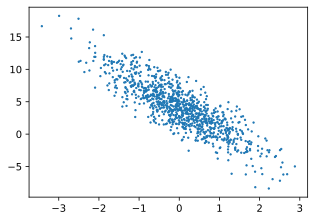

In [351]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(5, 3.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 2);

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [353]:
batch_size = 10 

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break 


[[-0.7259541   0.9109106 ]
 [ 0.18945862  2.382929  ]
 [-1.5175179   0.66342676]
 [ 0.45644096 -0.41080287]
 [ 0.11411911  0.671785  ]
 [-0.43482396 -0.30326208]
 [ 0.3696369   0.2696083 ]
 [-1.901856    0.41127837]
 [-0.40540498  1.3540168 ]
 [-0.38995364  0.44158444]]
<NDArray 10x2 @cpu(0)> 
[-0.35897803 -3.5281029  -1.078257    6.5136113   2.1464863   4.3575845
  4.0321527  -0.99298435 -1.2133447   1.917245  ]
<NDArray 10 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [359]:
lr = 0.03
num_epochs = 3 
net = linreg 
loss = squared_loss 

loss_ls, train_ls = [], []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
        loss_ls.append(l.mean().asscalar())
    train_l = loss(net(features, w, b), labels)
    train_ls.append(train_l.mean().asscalar())
    # if (epoch+1) % 10 == 0:
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.046045
epoch 2, loss 0.000195
epoch 3, loss 0.000053


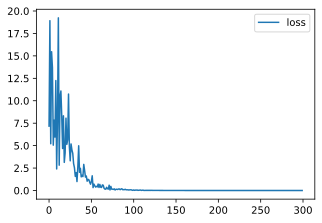

In [360]:
import matplotlib.pyplot as plt

plt.plot(loss_ls, label='loss')
# plt.plot(train_ls, label='train loss')
plt.legend()
plt.show()

## 3.3 线性回归的简洁实现

In [0]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
from mxnet.gluon import data as gdata 

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [363]:
for X, y in data_iter:
    print(X, y)
    break 


[[-0.6187518  -0.2503926 ]
 [ 0.8569925   0.5690341 ]
 [ 0.4266085   0.7918099 ]
 [-0.6663666   0.02384045]
 [-0.1386715   0.732445  ]
 [-1.4177015   1.0471172 ]
 [-1.0831494   0.7655263 ]
 [-2.1912577   0.36587134]
 [-0.6190732  -1.5131555 ]
 [-0.05780748  1.3848697 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.8041027  3.9697347  2.3604767  2.7846525  1.4385366 -2.1832635
 -0.5663462 -1.4243388  8.092183  -0.6281309]
<NDArray 10 @cpu(0)>


In [0]:
# gdata.ArrayDataset??

In [0]:
from mxnet.gluon import nn

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

reinit

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01), force_reinit=True)

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [0]:
dense = net[0]

In [371]:
num_epochs = 3

loss_ls, w1_ls, w2_ls, grad1_ls, grad2_ls = [], [], [], [], []
for epoch in range(1, num_epochs+1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
        loss_ls.append(l.mean().asscalar())
        w1_ls.append(dense.weight.data()[0][0].asscalar())
        w2_ls.append(dense.weight.data()[0][1].asscalar())
        grad1_ls.append(dense.weight.grad()[0][0].asscalar())
        grad2_ls.append(dense.weight.grad()[0][1].asscalar())
    l = loss(net(features), labels)
    print('w: ', dense.weight.data())
    print('grad: ', dense.weight.grad())
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

w:  
[[ 1.885567  -3.2356937]]
<NDArray 1x2 @cpu(0)>
grad:  
[[-1.6653026  1.1079844]]
<NDArray 1x2 @cpu(0)>
epoch 1, loss: 0.043048
w:  
[[ 1.9934958 -3.3918734]]
<NDArray 1x2 @cpu(0)>
grad:  
[[0.01240087 0.05623949]]
<NDArray 1x2 @cpu(0)>
epoch 2, loss: 0.000161
w:  
[[ 1.9999374 -3.399026 ]]
<NDArray 1x2 @cpu(0)>
grad:  
[[ 0.01977415 -0.04341876]]
<NDArray 1x2 @cpu(0)>
epoch 3, loss: 0.000048


In [372]:
true_w, dense.weight.data()[0][0]

([2, -3.4], 
 [1.9999374]
 <NDArray 1 @cpu(0)>)

In [373]:
true_b, dense.bias.data()

(4.2, 
 [4.1992884]
 <NDArray 1 @cpu(0)>)

In [374]:
dense.weight.grad()


[[ 0.01977415 -0.04341876]]
<NDArray 1x2 @cpu(0)>

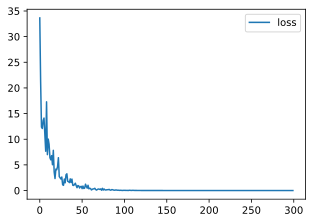

In [380]:
import matplotlib.pyplot as plt 

plt.plot(loss_ls, label='loss')
plt.legend()
plt.show()

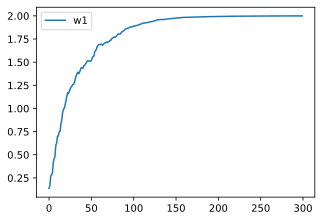

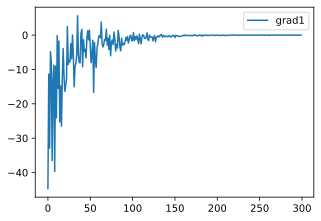

In [381]:
plt.plot(w1_ls, label='w1')
plt.legend()
plt.show()

plt.plot(grad1_ls, label='grad1')
plt.legend()
plt.show()
# w 增加是因为 grad 是负数，减去负数就是加正数，趋于平缓是因为 grad 绝对值变小，绝对值变小是因为 y_hat 越来越接近 y。

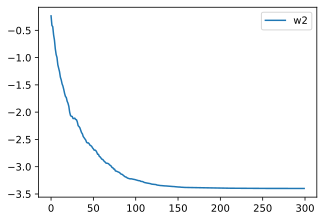

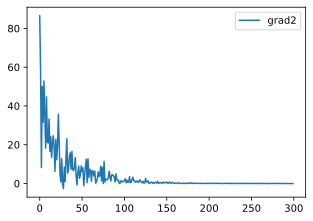

In [382]:
plt.plot(w2_ls, label='w2')
plt.legend()
plt.show()

plt.plot(grad2_ls, label='grad2')
plt.legend()
plt.show()